In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings


In [160]:

warnings.filterwarnings('ignore')

# Read data

In [161]:
df = pd.read_csv("income_evaluation.csv")

In [162]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Targetnya adalah attribute : income

In [163]:
dfCat = df.select_dtypes(include=['object'])

for i in dfCat.columns:
    print(dfCat[i].value_counts())
    print("\n")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64


 Prof-specialty       4140
 Craft-repair         4099
 Exec-m

# Preprocessing

## Duplicated Handling

In [164]:
df.duplicated().sum()

24

In [165]:
df.drop_duplicates(inplace=True)

In [166]:
df.duplicated().sum()

0

## Data encoding 

In [167]:
x = df.drop(' income',axis=1)
Y = df[[' income']] 

In [168]:
x.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
dtype: object

Mengubah data object menjadi numerikal

In [169]:
x = pd.get_dummies(x)
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Split

In [170]:
df[' income'].value_counts()

 <=50K    24698
 >50K      7839
Name:  income, dtype: int64

karena data inbalance maka stratify akan digunakan pada attribute income

In [171]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, stratify=Y)

menggunakan test size sebesar 30%

# Data Standarisasi

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
ss = StandardScaler()

In [174]:
x_scaled_train = ss.fit_transform(X_train)
x_scaled_test = ss.fit_transform(X_test)

# Pendekatan Supervised Learning - Klasifikasi

Algoritma 1
- melatih model dengan data training
- memprediksi model yang datanya sudah ditrain
- round(accuracy_classifier,3) maksudnya adalah hasilnya dibulatkan menjadi 3 angka dibelakang koma

In [175]:
knn = KNeighborsClassifier()
knn.fit(x_scaled_train,y_train)

knn_predic = knn.predict(x_scaled_test)
accuracy_knn = accuracy_score(y_test, knn_predic)
print("Akurasi algoritma KNN dengan default paramater :", round(accuracy_knn,3))

Akurasi algoritma KNN dengan default paramater : 0.826


# Gunakan minimal 2 algoritma untuk dibandingkan score terbaiknya
- Algortima Gaussian Naive Bayes
- Algoritma satunya KNN yang sudah diterapkan di atas tadi

In [176]:
classifier = GaussianNB()

Melatih model dari Gaussian Classifier

In [177]:
classifier.fit(x_scaled_train,y_train)

GaussianNB()

Akurasi model untuk x_slaced_test
- round(accuracy_classifier,3) maksudnya adalah hasilnya dibulatkan menjadi 3 angka dibelakang koma
- membandingan hasil prediksi dengan hasil aktual

In [178]:
classifier_predic = classifier.predict(x_scaled_test)
accrucary_nb = accuracy_score(y_test, classifier_predic)
print("Hasil akurasi algoritma Gaussian Naive Bayes adalah :", round(accrucary_nb,3))

Hasil akurasi algoritma Gaussian Naive Bayes adalah : 0.759


Menampilkan hasil visual perbandingan anatara 2 algoritma
- prediksi value nya di ambil dari hasil accuracy KNN dan naive bayes

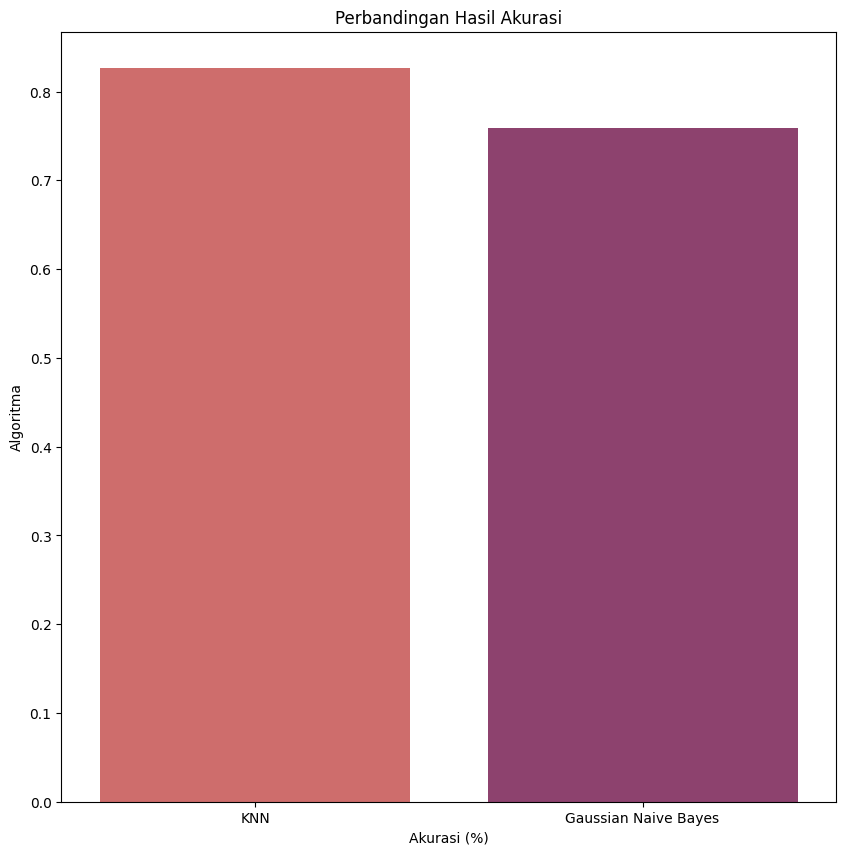

In [179]:
algoritma = ["KNN","Gaussian Naive Bayes"]
prediksi_value = [accuracy_knn,accrucary_nb]
plt.figure(figsize=(10,10))
sns.barplot(x= algoritma, y= prediksi_value,palette='flare')
plt.title("Perbandingan Hasil Akurasi")
plt.xlabel("Akurasi (%)")
plt.ylabel("Algoritma")
plt.show()